# CORAL domain adaptation applied on 2D moons data
Implementation of [this paper](https://arxiv.org/pdf/1511.05547.pdf) on moons

In [466]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import make_moons

## Generate the data

### Create moons

In [467]:
N_points = 100

In [468]:
X = make_moons(N_points, noise=0.1)

In [469]:
X_source = X[0][X[1] == 0]

In [470]:
X_target = X[0][X[1] == 1]

### Normalize

In [471]:
def normalize(X):
    return (X - np.mean(X, axis=0)) / np.std(X, axis=0)

In [472]:
X_source = normalize(X_source)

In [473]:
X_target = normalize(X_target)

### Display the data

In [474]:
def display(X_s, X_t):
    plt.rcParams['figure.figsize'] = (10, 7)
    plt.axis("equal")
    plt.axis([-4,4,-4,4])

    plt.scatter(X_s[:,0], X_s[:,1], label="source")
    plt.scatter(X_t[:,0], X_t[:,1], label="target")
    plt.legend()

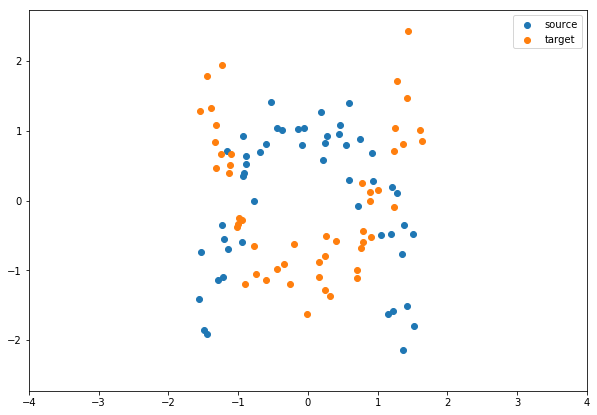

In [475]:
display(X_source, X_target)

## Run the algorithm

In [476]:
lamda = 0

In [477]:
C_source = np.cov(X_source, rowvar=False) + lamda * np.eye(X_source.shape[1])
C_target = np.cov(X_target, rowvar=False) + lamda * np.eye(X_target.shape[1])

In [478]:
A_coral = np.dot(sp.linalg.sqrtm(sp.linalg.inv(C_source)), sp.linalg.sqrtm(C_target))

In [480]:
X_source_coral = np.dot(X_source, A_coral)

## Display the results

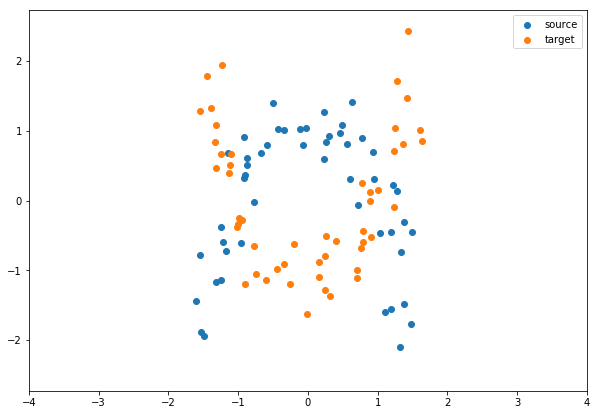

In [481]:
display(X_source_coral, X_target)

As you can see, the algorithm hasn't managed to align the distributions. Let's look at the covariance:

In [484]:
np.cov(X_source_coral, rowvar=False)

array([[ 1.02040816,  0.00814679],
       [ 0.00814679,  1.02040816]])

In [485]:
C_target

array([[ 1.02040816,  0.00814679],
       [ 0.00814679,  1.02040816]])

They are the same. It means that the difference between our two distributions is located in higher moments